In [ ]:
# Installing libs

In [ ]:
!pip install seaborn
!pip install flask
!pip install flask-ngrok
!pip install flask-cors



: 

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


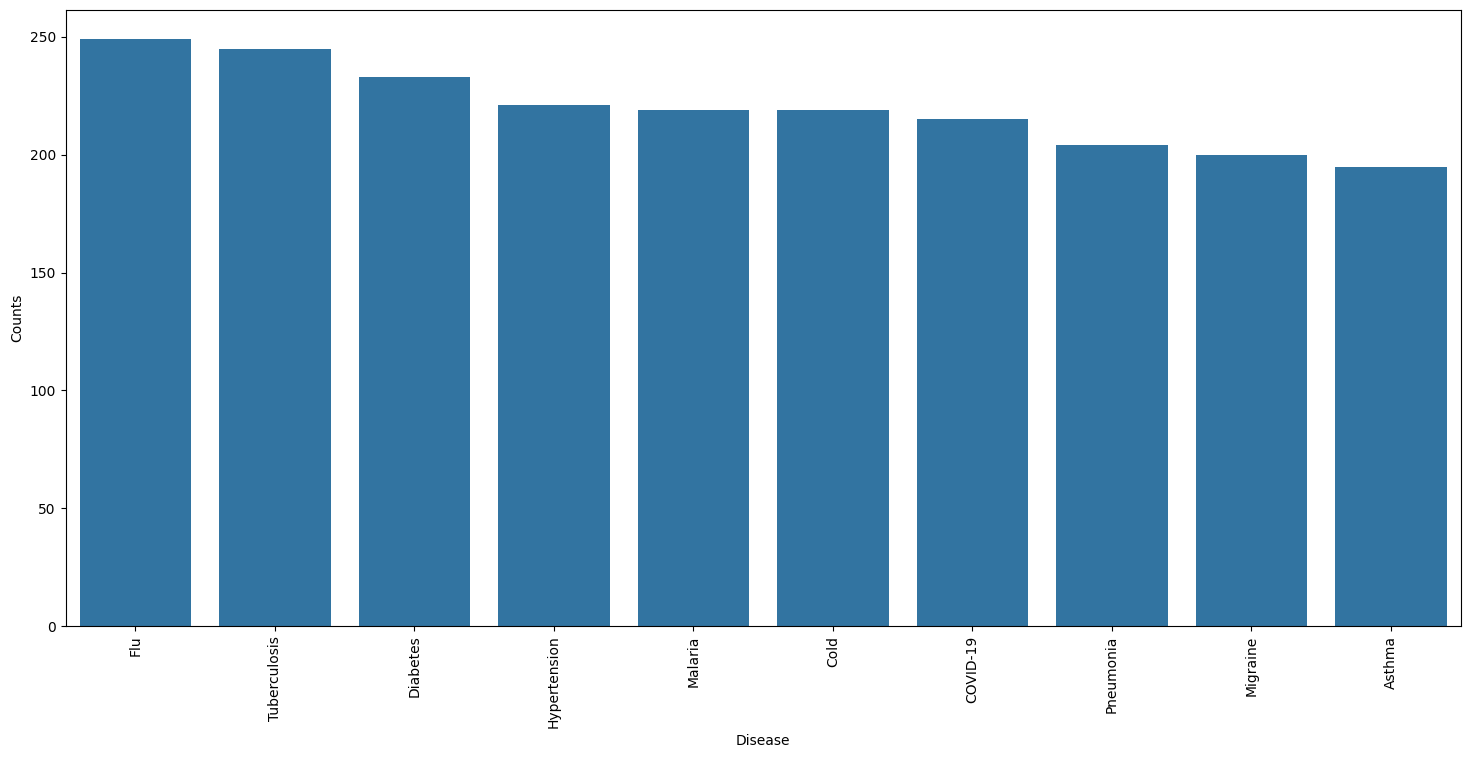

In [3]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [4]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (1760, 180), (1760,)
Test: (440, 180), (440,)


In [6]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [0.08636364 0.05454545 0.12272727 0.10909091 0.09545455 0.08636364
 0.09545455 0.07727273 0.10909091 0.11818182]
Mean Score: 0.09545454545454546
Gaussian NB
Scores: [0.07272727 0.06363636 0.1        0.10909091 0.07727273 0.05454545
 0.09090909 0.07272727 0.12272727 0.07272727]
Mean Score: 0.08363636363636363
Random Forest
Scores: [0.1        0.06818182 0.1        0.14090909 0.10909091 0.08181818
 0.09090909 0.10454545 0.09090909 0.07272727]
Mean Score: 0.09590909090909092


Accuracy on train data by SVM Classifier: 88.86363636363637
Accuracy on test data by SVM Classifier: 10.0


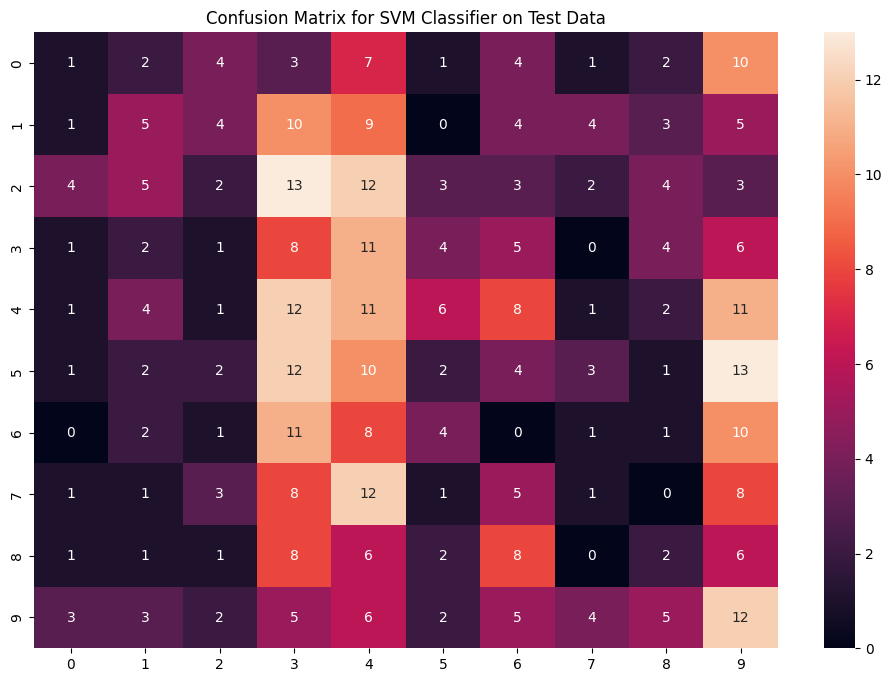

Accuracy on train data by Naive Bayes Classifier: 30.96590909090909
Accuracy on test data by Naive Bayes Classifier: 10.0


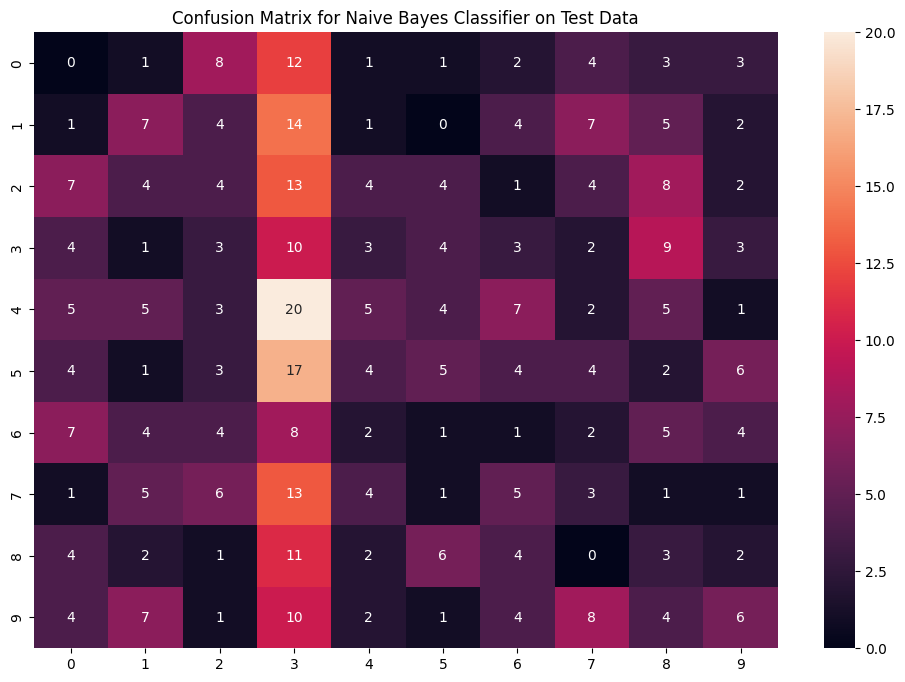

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 9.318181818181818


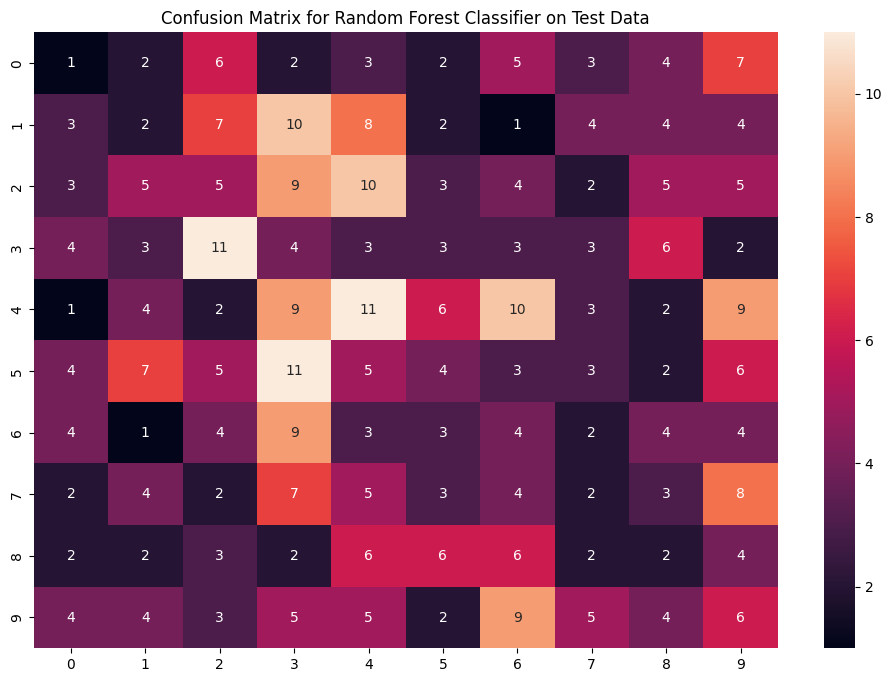

In [7]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Accuracy on Test dataset by the combined model: 12.666666666666668



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


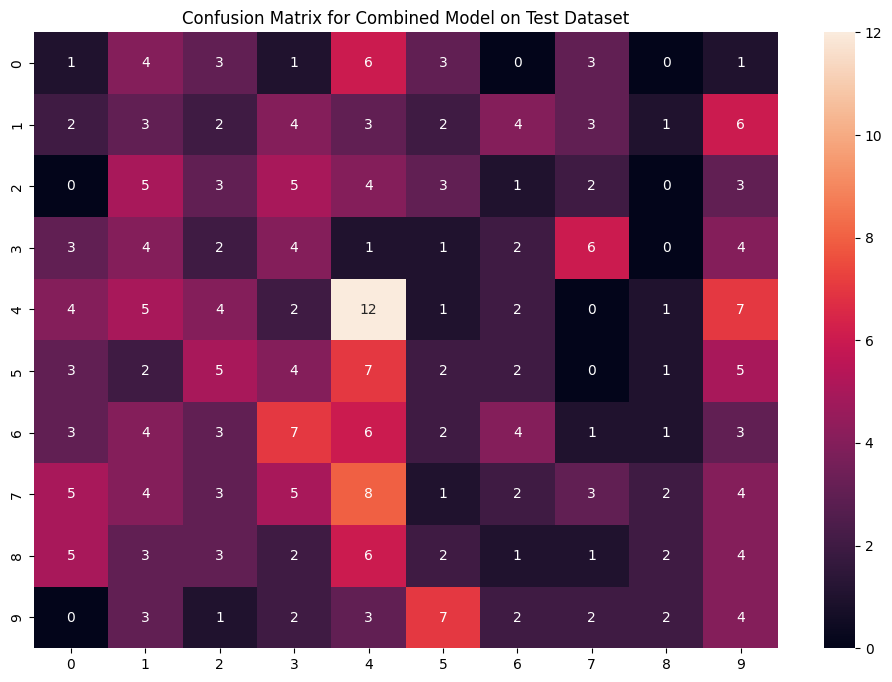

In [8]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [9]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Capitalize each symptom and replace spaces with underscores to match the format in the symptom_index
    symptoms = [symptom.strip().replace(" ", "_").capitalize() for symptom in symptoms]
    
    # Check if all symptoms are valid
    invalid_symptoms = [s for s in symptoms if s not in data_dict["symptom_index"]]
    if invalid_symptoms:
        return {"error": f"Invalid symptoms: {', '.join(invalid_symptoms)}"}
    
    # Proceed with the prediction if all symptoms are valid
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    input_data = np.array(input_data).reshape(1, -1)
    
    # Generating individual predictions from the models
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'error': 'Invalid symptoms: Skin_rash, Nodal_skin_eruptions'}


In [10]:
import numpy as np
import statistics

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Capitalize and format symptoms to match symptom_index
    symptoms = [symptom.strip().replace(" ", "_").capitalize() for symptom in symptoms]
    
    # Debugging: Check what symptoms are being processed
    print(f"Processing symptoms: {symptoms}")
    
    # Check if all symptoms are valid
    invalid_symptoms = [s for s in symptoms if s not in data_dict["symptom_index"]]
    if invalid_symptoms:
        return {"error": f"Invalid symptoms: {', '.join(invalid_symptoms)}"}
    
    # Proceed with the prediction if all symptoms are valid
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    input_data = np.array(input_data).reshape(1, -1)
    
    # Debugging: Check if the input_data is valid
    print(f"Input data for model prediction: {input_data}")
    
    # Generating individual predictions from the models
    try:
        rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
        nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
        svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
        
        # Debugging: Print model predictions
        print(f"Model predictions: RF: {rf_prediction}, NB: {nb_prediction}, SVM: {svm_prediction}")
        
        # Take the mode of all predictions for the final prediction
        final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
        
        predictions = {
            "rf_model_prediction": rf_prediction,
            "naive_bayes_prediction": nb_prediction,
            "svm_model_prediction": svm_prediction,
            "final_prediction": final_prediction
        }
        return predictions
    
    except Exception as e:
        # If any error occurs during prediction, return the error message
        return {"error": str(e)}


In [ ]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from flask_cors import CORS

app = Flask(__name__)
CORS(app)
run_with_ngrok(app)

@app.route('/users', methods=['POST'])
def get_users():
    try:
        
        request_data = request.get_json()
        
        if not request_data or 'symptoms' not in request_data:
            return jsonify({"error": "Invalid input. 'symptoms' field is required."}), 400
        
        symptoms = request_data['symptoms']
        app.logger.info("Received symptoms: %s", symptoms)
        
        
        data = predictDisease(symptoms)
        return jsonify(data), 200

    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Start Flask app
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "c:\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Python312\Lib\threading.py", line 1431, in run
    self.function(*self.args, **self.kwargs)
  File "c:\Python312\Lib\site-packages\flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
                    ^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\flask_ngrok.py", line 38, in _run_ngrok
    tunnel_url = j['tunnels'][0]['public_url']  # Do the parsing of the get
                 ~~~~~~~~~~~~^^^
IndexError: list index out of range
127.0.0.1 - - [20/Dec/2024 13:34:46] "OPTIONS /users HTTP/1.1" 200 -
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Py

Processing symptoms: ['Fatigue', 'Dizziness']
Input data for model prediction: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Model predictions: RF: Cold, NB: Asthma, SVM: Cold
